# Cyberbulling: EDI project

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import seaborn as sns
from wordcloud import WordCloud
# !pip install wordcloud

In [48]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score

### Importing Data

In [3]:
cb =pd.read_csv("Cyberbullying.csv")

In [4]:
cb.head()

tweet_text               text
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying

In [5]:
cb.text.value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Non-Bullying            638
Bullying                427
Name: text, dtype: int64

In [6]:
# Encoding the labels
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

cb['cyberbullying_type_encoded'] = labelencoder.fit_transform(cb['text'])

In [7]:
cb[['text', 'cyberbullying_type_encoded']].value_counts()


text                 cyberbullying_type_encoded
religion             7                             7998
age                  2                             7992
gender               4                             7973
ethnicity            3                             7961
not_cyberbullying    5                             7945
other_cyberbullying  6                             7823
Non-Bullying         1                              638
Bullying             0                              427
dtype: int64

In [8]:
cb.head()

tweet_text               text  \
0  In other words #katandandre, your food was cra...  not_cyberbullying   
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   

   cyberbullying_type_encoded  
0                           5  
1                           5  
2                           5  
3                           5  
4                           5

<AxesSubplot:>

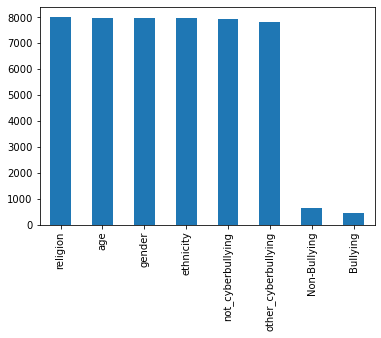

In [9]:
#data visualization
cb['text'].value_counts().plot(kind='bar')

In [10]:
import re
import string
cb.tweet_text.head()

0    In other words #katandandre, your food was cra...
1    Why is #aussietv so white? #MKR #theblock #ImA...
2    @XochitlSuckkks a classy whore? Or more red ve...
3    @Jason_Gio meh. :P  thanks for the heads up, b...
4    @RudhoeEnglish This is an ISIS account pretend...
Name: tweet_text, dtype: object

In [11]:
cb.text.value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Non-Bullying            638
Bullying                427
Name: text, dtype: int64

In [12]:
# converting tweet text to lower case
cb['tweet_text'] = cb['tweet_text'].str.lower()
cb.tail()

tweet_text      text  \
48752  no we are not, but you are a race baiting libt...  Bullying   
48753  you wont get anyone for this challenge., after...  Bullying   
48754  i will follow you if you are not a libtard,mus...  Bullying   
48755  michaelianblack ur a child, an ostrich w/ your...  Bullying   
48756  foxnews. not to all the ppl i know that live t...  Bullying   

       cyberbullying_type_encoded  
48752                           0  
48753                           0  
48754                           0  
48755                           0  
48756                           0

In [13]:
cb.head()

tweet_text               text  \
0  in other words #katandandre, your food was cra...  not_cyberbullying   
1  why is #aussietv so white? #mkr #theblock #ima...  not_cyberbullying   
2  @xochitlsuckkks a classy whore? or more red ve...  not_cyberbullying   
3  @jason_gio meh. :p  thanks for the heads up, b...  not_cyberbullying   
4  @rudhoeenglish this is an isis account pretend...  not_cyberbullying   

   cyberbullying_type_encoded  
0                           5  
1                           5  
2                           5  
3                           5  
4                           5

In [14]:
# Checking for null values
np.sum(cb.isnull())

tweet_text                    0
text                          0
cyberbullying_type_encoded    0
dtype: int64

### Data cleaning

In [15]:
# stopwords list that needs to be excluded from the data
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [16]:
# removing stopwoords from the tweet text
STOPWORDS = set(stopwordlist)

def clean_stopwords(tweet):
    return " ".join([word for word in str(tweet).split() if word not in STOPWORDS])

cb['tweet_text'] = cb['tweet_text'].apply(lambda tweet: clean_stopwords(tweet))

In [17]:
# cleaning and removing punctuations

import string
english_puctuations = string.punctuation

def clean_puctuations(text):
    translator = str.maketrans('','', english_puctuations)
    return text.translate(translator)

cb['tweet_text'] = cb['tweet_text'].apply(lambda x : clean_puctuations(x))

In [18]:
cb['tweet_text'][20]

'halalcunty biebervalue liamxkiwi greenlinerzjm halalflaws know saudis chased girls burning building httptco8b1aclczn9'

In [19]:
# cleaning and removing repeating characters

def clean_repeating_characters(tweet):
    return re.sub(r'(.)1+', r'1', tweet)

cb['tweet_text'] = cb['tweet_text'].apply(lambda x: clean_repeating_characters(x))

In [20]:
# cleaning and removing numeric data

def clean_numeric(text):
    return re.sub('[0-9]+', '', text)
    
cb['tweet_text'] = cb['tweet_text'].apply(lambda x: clean_numeric(x))

In [21]:
# Tokenization of tweet text

from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer('\w+')
cb['tweet_text'] = cb['tweet_text'].apply(tokenizer.tokenize)

In [22]:
cb.head()

tweet_text               text  \
0      [words, katandandre, food, crapilicious, mkr]  not_cyberbullying   
1  [aussietv, white, mkr, theblock, imacelebritya...  not_cyberbullying   
2  [xochitlsuckkks, classy, whore, red, velvet, c...  not_cyberbullying   
3  [jasongio, meh, p, thanks, heads, up, but, not...  not_cyberbullying   
4  [rudhoeenglish, isis, account, pretending, kur...  not_cyberbullying   

   cyberbullying_type_encoded  
0                           5  
1                           5  
2                           5  
3                           5  
4                           5

In [25]:
np.sum(cb.isnull())

tweet_text                    0
text                          0
cyberbullying_type_encoded    0
dtype: int64

In [26]:
cb.head(15)

tweet_text               text  \
0       [words, katandandre, food, crapilicious, mkr]  not_cyberbullying   
1   [aussietv, white, mkr, theblock, imacelebritya...  not_cyberbullying   
2   [xochitlsuckkks, classy, whore, red, velvet, c...  not_cyberbullying   
3   [jasongio, meh, p, thanks, heads, up, but, not...  not_cyberbullying   
4   [rudhoeenglish, isis, account, pretending, kur...  not_cyberbullying   
5   [rajaaab, quickieleaks, yes, test, god, good, ...  not_cyberbullying   
6   [itu, sekolah, ya, bukan, tempat, bully, ga, j...  not_cyberbullying   
7         [karma, hope, bites, kat, butt, nasty, mkr]  not_cyberbullying   
8      [stockputout, everything, but, mostly, priest]  not_cyberbullying   
9      [rebecca, black, drops, school, due, bullying]  not_cyberbullying   
10                     [jordisdead, httptcousqinywgn]  not_cyberbullying   
11           [bully, flushes, kd, httptwitvidcomatnp]  not_cyberbullying   
12                                      [ughhhh, mkr]  not_cyberbullying   
13  [rt, kurdsnews, turkish, state, killed, childr...  not_cyberbullying   
14  [love, best, response, hotcakes, managed, film...  not_cyberbullying   

    cyberbullying_type_encoded  
0                            5  
1                            5  
2                            5  
3                            5  
4                            5  
5                            5  
6                            5  
7                            5  
8                            5  
9                            5  
10                           5  
11                           5  
12                           5  
13                           5  
14                           5

In [27]:
# stemming

import nltk

st = nltk.PorterStemmer()

def text_stemming(tweet):
    tweet = [st.stem(word) for word in tweet]
    return tweet

cb['tweet_text'] = cb['tweet_text'].apply(lambda x: text_stemming(x))

In [32]:
cb['tweet_text'][103]

['edgeofthesandbx',
 'batchelorshow',
 'feardept',
 'dozen',
 'wit',
 'seen',
 'russian',
 'target',
 'civilian',
 'propaganda']

In [33]:
# lemmatization

lm = nltk.WordNetLemmatizer()

def text_lemmatization(tweet):
    tweet = [lm.lemmatize(word) for word in tweet]
    return tweet

cb['tweet_text'] = cb['tweet_text'].apply(lambda x: text_lemmatization(x))

In [34]:
cb['tweet_text'][103]

['edgeofthesandbx',
 'batchelorshow',
 'feardept',
 'dozen',
 'wit',
 'seen',
 'russian',
 'target',
 'civilian',
 'propaganda']

In [35]:
cb['tweet_text'].head()

0             [word, katandandr, food, crapilici, mkr]
1    [aussietv, white, mkr, theblock, imacelebritya...
2    [xochitlsuckkk, classi, whore, red, velvet, cu...
3    [jasongio, meh, p, thank, head, up, but, not, ...
4    [rudhoeenglish, isi, account, pretend, kurdish...
Name: tweet_text, dtype: object

In [36]:
# plotting word cloud excluding other_cybberbullying and not_cyberbullying
new_cb = cb
new_cb = new_cb[new_cb['text'] != 'other_cyberbullying']
new_cb = new_cb[new_cb['text'] != 'not_cyberbullying']
new_cb = new_cb[new_cb['text'] != 'Non-Bullying']
new_cb = new_cb['tweet_text'].apply(lambda x: " ".join(x))

In [37]:
# plotting word cloud excluding other_cybberbullying and not_cyberbullying
new_cb2 = cb
new_cb2 = new_cb2[new_cb2['text'] != 'other_cyberbullying']
new_cb2 = new_cb2[new_cb2['text'] != 'not_cyberbullying']
new_cb2 = new_cb2[new_cb2['text'] != 'Non-Bullying']
new_cb2 = new_cb2[new_cb2['text'] != 'religion']
new_cb2 = new_cb2[new_cb2['text'] != 'gender']
new_cb2 = new_cb2[new_cb2['text'] != 'age']
new_cb2 = new_cb2[new_cb2['text'] != 'Bullying']
new_cb2 = new_cb2['tweet_text'].apply(lambda x: " ".join(x))

In [38]:
new_cb2

39731    hey dumb fuck celeb stop someth peopl public f...
39732    fuck u bitch rt tayyoung fuck obama dumb a nigger
39733    joebiden no joe racist mani video audio clip r...
39734    truck look dumb fuck tri make look wors aint c...
39735                       nigger food cafe today disgust
                               ...                        
47687    black ppl arent expect anyth depend anyth yet ...
47688    turner not withhold disappoint turner call cou...
47689    swear god dumb nigger bitch got bleach hair re...
47690    yea fuck rt therealexel nigger fuck unfollow m...
47691    bro u gotta chill rt chillshrammi dog fuck kp ...
Name: tweet_text, Length: 7961, dtype: object

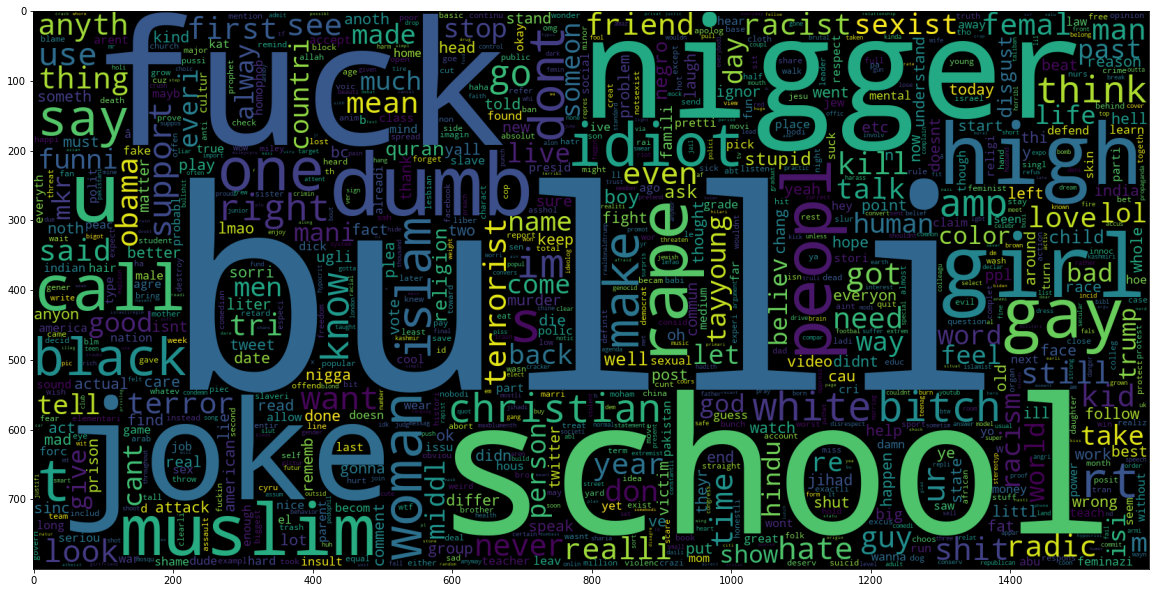

In [39]:
plt.figure(figsize= (20,20))
wc = WordCloud(max_words=1000, width= 1600, height= 800, 
                collocations= False).generate(' '.join(new_cb))
plt.imshow(wc)

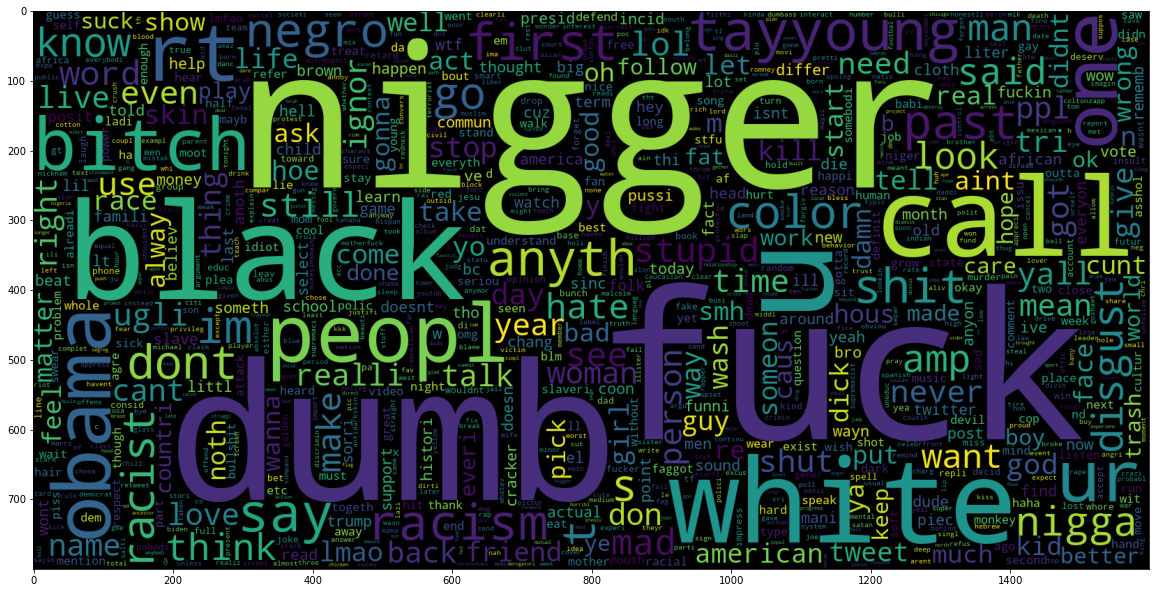

In [40]:
plt.figure(figsize= (20,20))
wc2 = WordCloud(max_words=1000, width= 1600, height= 800, 
                collocations= False).generate(' '.join(new_cb2))
plt.imshow(wc2)

In [41]:
cb.head(14)

tweet_text               text  \
0            [word, katandandr, food, crapilici, mkr]  not_cyberbullying   
1   [aussietv, white, mkr, theblock, imacelebritya...  not_cyberbullying   
2   [xochitlsuckkk, classi, whore, red, velvet, cu...  not_cyberbullying   
3   [jasongio, meh, p, thank, head, up, but, not, ...  not_cyberbullying   
4   [rudhoeenglish, isi, account, pretend, kurdish...  not_cyberbullying   
5   [rajaaab, quickieleak, ye, test, god, good, ba...  not_cyberbullying   
6   [itu, sekolah, ya, bukan, tempat, bulli, ga, j...  not_cyberbullying   
7          [karma, hope, bite, kat, butt, nasti, mkr]  not_cyberbullying   
8         [stockputout, everyth, but, mostli, priest]  not_cyberbullying   
9          [rebecca, black, drop, school, due, bulli]  not_cyberbullying   
10                     [jordisdead, httptcousqinywgn]  not_cyberbullying   
11             [bulli, flush, kd, httptwitvidcomatnp]  not_cyberbullying   
12                                      [ughhhh, mkr]  not_cyberbullying   
13  [rt, kurdsnew, turkish, state, kill, child, la...  not_cyberbullying   

    cyberbullying_type_encoded  
0                            5  
1                            5  
2                            5  
3                            5  
4                            5  
5                            5  
6                            5  
7                            5  
8                            5  
9                            5  
10                           5  
11                           5  
12                           5  
13                           5

## MODEL CREATION

In [42]:
cb['tweet_text'] = cb['tweet_text'].apply(lambda x : " ".join(x))
cb

tweet_text               text  \
0                     word katandandr food crapilici mkr  not_cyberbullying   
1      aussietv white mkr theblock imacelebrityau tod...  not_cyberbullying   
2           xochitlsuckkk classi whore red velvet cupcak  not_cyberbullying   
3      jasongio meh p thank head up but not concern a...  not_cyberbullying   
4      rudhoeenglish isi account pretend kurdish acco...  not_cyberbullying   
...                                                  ...                ...   
48752             no not but race bait libtard jackwagon           Bullying   
48753  wont get anyon challeng snowflak libtard ton g...           Bullying   
48754         follow not libtardmuslim ate involv blm er           Bullying   
48755  michaelianblack ur child ostrich w head sand p...           Bullying   
48756  foxnew not ppl know live there love it it not ...           Bullying   

       cyberbullying_type_encoded  
0                               5  
1                               5  
2                               5  
3                               5  
4                               5  
...                           ...  
48752                           0  
48753                           0  
48754                           0  
48755                           0  
48756                           0  

[48757 rows x 3 columns]

In [43]:
# Splitting the data into train and test
X, y = cb['tweet_text'], cb['text']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 41)

In [44]:
# Transforming the data using TF-IDF Vectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features= 500000)
vectoriser.fit(X_train)
print("No. of feature words: ",len(vectoriser.get_feature_names()))

No. of feature words:  359793


C:\Users\mrunm\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [45]:
# transforming the data
X_train = vectoriser.transform(X_train)
X_test = vectoriser.transform(X_test)

In [46]:
# Model
from sklearn.svm import SVC
svm_model_linear = SVC(kernel= 'linear', C = 1).fit(X_train, y_train)
svm_predictions  = svm_model_linear.predict(X_test)
accuracy = svm_model_linear.score(X_test, y_test)
print(accuracy)

0.8212674323215751


In [49]:
print(classification_report(y_test,svm_predictions))
print(confusion_matrix(y_test,svm_predictions))
print('Accuracy',accuracy_score(y_test,svm_predictions))

                     precision    recall  f1-score   support

           Bullying       0.53      0.37      0.43        90
       Non-Bullying       0.60      0.22      0.32       123
                age       0.92      0.99      0.95      1574
          ethnicity       0.95      0.99      0.97      1639
             gender       0.91      0.87      0.89      1631
  not_cyberbullying       0.62      0.49      0.55      1588
other_cyberbullying       0.59      0.69      0.63      1521
           religion       0.93      0.96      0.95      1586

           accuracy                           0.82      9752
          macro avg       0.76      0.70      0.71      9752
       weighted avg       0.82      0.82      0.82      9752

[[  33   11    1    7    8    4   23    3]
 [  15   27    2   11    8   12   46    2]
 [   0    0 1554    1    2    6   11    0]
 [   1    0    1 1621    4    4    8    0]
 [   5    1    8   14 1419   89   87    8]
 [   3    5   99   20   58  781  551   71]
 [   5 

In [50]:
# fitting naive bayes to the training set
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

classifier = MultinomialNB().fit(X_train, y_train)

In [51]:
# predicting test set results
y_pred = classifier.predict(X_test)

In [52]:

print(classification_report(y_test,y_pred)) 
print('Accuracy',accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

                     precision    recall  f1-score   support

           Bullying       0.00      0.00      0.00        90
       Non-Bullying       0.00      0.00      0.00       123
                age       0.66      0.99      0.80      1574
          ethnicity       0.83      0.94      0.88      1639
             gender       0.82      0.86      0.84      1631
  not_cyberbullying       0.60      0.32      0.42      1588
other_cyberbullying       0.60      0.38      0.47      1521
           religion       0.77      0.98      0.86      1586

           accuracy                           0.73      9752
          macro avg       0.54      0.56      0.53      9752
       weighted avg       0.70      0.73      0.70      9752

Accuracy 0.7332854799015587
[[   0    0   14   35   15    1    4   21]
 [   0    0   34   23   23    1    7   35]
 [   0    0 1563    4    0    0    1    6]
 [   0    0   41 1545    6    5    5   37]
 [   0    0   42   45 1404   64   39   37]
 [   0    0  345   75 

C:\Users\mrunm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mrunm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mrunm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [54]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [57]:
y_pred1 = dt.predict(X_test)

In [58]:
print(classification_report(y_test,y_pred1)) 
print(confusion_matrix(y_test,y_pred1))
print('Accuracy',accuracy_score(y_test,y_pred1))

                     precision    recall  f1-score   support

           Bullying       0.31      0.38      0.34        90
       Non-Bullying       0.35      0.19      0.24       123
                age       0.98      0.97      0.97      1574
          ethnicity       0.98      0.96      0.97      1639
             gender       0.85      0.82      0.84      1631
  not_cyberbullying       0.48      0.50      0.49      1588
other_cyberbullying       0.49      0.54      0.51      1521
           religion       0.96      0.91      0.93      1586

           accuracy                           0.78      9752
          macro avg       0.68      0.66      0.66      9752
       weighted avg       0.78      0.78      0.78      9752

[[  34   14    0    5    9    7   19    2]
 [  28   23    1    6   13   27   22    3]
 [   1    0 1526    1    3   25   18    0]
 [   3    5    3 1581    5   17   20    5]
 [   4    5    1    5 1342  121  146    7]
 [   5    6   20    7   96  794  620   40]
 [  28 